# Pre Entrega #5:
### Proyecto Complementario I.
#### José María Reyes Retana Tamayo
##### Data Science - 32845
##### Profesor: Luis Ramírez
##### Jesús Alfredo Mogel Chim

### Validación de Overfit o Underfit

Se dice que un modelo de Machine Learnig tiende al fallo por "overfit" cuando trabaja de manera correcta con el conjunto de datos de entrenamiento, pero no con el de prueba. Y que el fallo es por "underfit" cuando los errores están ya presentes con el conjunto de entrenamiento.

In [1]:
# Importación de librerías a usar:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Ubicación del archivo CSV dentro de el Codespace:
data_set_csv = "/workspaces/Coderhouse/Proyecto/Data/Raw/Beer Profiles and Ratings.csv"

# Creación del Data Frame:
data_set = pd.read_csv(data_set_csv)
data_frame = pd.DataFrame(data_set)

# Creación del Data Frame de trabajo y copia de valores:
wrk_df = data_frame.copy()

# Características para nuestros gráficos.
mpl.rcParams['axes.titleweight'] = 'heavy'

In [2]:
#Para evitar texto de advertencias en los resultados.
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Renombramos la columna "Beer Name (Full)" para evitar errores de código:
wrk_df.rename(columns = {'Beer Name (Full)' : 'Full_name'}, inplace = True)

# Columna "Name" se usa como índice.
#wrk_df = wrk_df.set_index('Name')

# Obtenemos un array con el promedio de IBU de cada cerveza.
prom_IBU = pd.DataFrame((wrk_df[["Min IBU", "Max IBU"]].mean(axis = 1)), columns = ['IBU_Promedio'])

# Agregamos la columna IBU Promedio a nuestra copia del Data Set.
wrk_df = pd.concat([wrk_df,prom_IBU], axis = 1)

# Creamos una columna que identique las cervezas si tienen más o menos de 35 Grados IBU:
wrk_df['amargor'] = np.where(wrk_df['IBU_Promedio'] > 35, 'Muy amarga', 'Poco Amarga')

# Separando la columna Style
wrk_df[["Style", "Secondary Style"]] = wrk_df.Style.str.split(" - ", expand = True)

# Creamos una columna que identique las cervezas si tienen más o menos de 6° de alcohol:
wrk_df['nivel_alcohol'] = np.where(wrk_df['ABV'] >= 6, 'Alto', 'Promedio')

In [4]:
# Calculamos el valor promedio de los Grados IBU y de calificaciones por cerveza.
IBU_promedio = wrk_df["IBU_Promedio"].mean()
prom_no_calif = wrk_df["number_of_reviews"].mean()

In [5]:
#Se separa la variable objetivo (target feature) en un vector:
flav_obj = wrk_df['review_taste']

In [6]:
#Importamos una linbrería más con la que se trabajará:
from scipy import stats
import statsmodels.api as sm

In [7]:
#Importación de librerías y funciones para construir el algoritmo de clasificación y evaluarlo.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [8]:
#Construcción del nuevo data frame con las variables deseadas:
wrk_df3 = wrk_df[['ABV', 'IBU_Promedio', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty']].copy()
wrk_df3

,ABV,IBU_Promedio,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,5.3,37.5,13,32,9,47,74,33,0,33,57,8,111
1,7.2,37.5,12,57,18,33,55,16,0,24,35,12,84
2,5.0,37.5,14,37,6,42,43,11,0,10,54,4,62
3,8.5,37.5,13,55,31,47,101,18,1,49,40,16,119
4,7.2,37.5,25,51,26,44,45,9,1,11,51,20,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,8.8,42.5,15,37,24,35,46,19,0,23,45,67,74
3193,6.0,42.5,15,31,23,16,54,43,0,54,14,140,58
3194,6.8,42.5,8,44,24,19,52,21,0,26,21,96,77
3195,7.5,42.5,11,36,50,70,72,59,0,81,110,18,73


In [9]:
#Establecemos la variable objetivo:
estilo_obj = wrk_df[['Style']]

Probamos con el conjunto de prueba después de entrenar a nuestro modelo.

In [10]:
#Separamos en entrenamiento/prueba en razón 80/20 %
X_train, X_test, y_train, y_test = train_test_split(wrk_df3, estilo_obj, test_size=0.2, random_state = 1)
#Creamos un modelo Random Forest con parametros por defect
modelo1 = RandomForestClassifier(random_state = 1)
modelo1.fit(X_train, y_train)
#Obtenemos las predicciones del modelo con X_test
predicciones = modelo1.predict(X_test) 

In [11]:
#Convertimos el DataFrame de respuestas de la prueba en un array para comparar con las predicciones
prueba1 = y_test['Style'].to_numpy()

In [12]:
#Comparación de los arrays y creación de arrays binarios.
pred1 = []
resp1 = []
for i in range(len(prueba1)):
    if prueba1[i] == predicciones[i]:
        pred1.append(1)
    else:
        pred1.append(0)
    resp1.append(1)

In [13]:
#Creación de la matriz de confusión 1
matriz1 = metrics.confusion_matrix(pred1, resp1)
matriz1

array([[  0, 167],
       [  0, 473]])

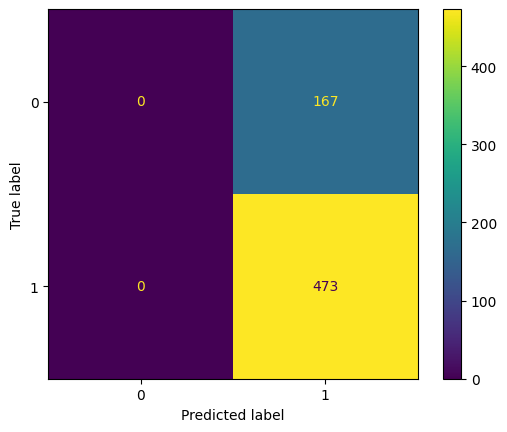

In [14]:
#Gráfica de la matriz 1
disp1 = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz1)
disp1.plot()

In [15]:
exactitud1 = ((473/640)*100)
# Precisión y la sensibilidad tendrían valor de 100%, puesto que no hay FP ni FN.
print(f"La exactitud de este modelo es de {exactitud1 : .2f}%")

La exactitud de este modelo es de  73.91%


En la sección anterior se probó la exactitud de las predicciones con respecto al conjunto de datos de entrenamiento.

In [16]:
#Obtenemos las predicciones del modelo con X_train
predicciones2 = modelo1.predict(X_train)
#Conjunto de respuestas correctas del entrenamiento y_train
entre1 = y_train['Style'].to_numpy()
#Convertimos a datos binarios
pred2 = []
resp2 = []
for i in range(len(entre1)):
    if entre1[i] == predicciones2[i]:
        pred2.append(1)
    else:
        pred2.append(0)
    resp2.append(1)

In [17]:
#Creamos la matriz de confusión
matriz2 = metrics.confusion_matrix(pred2, resp2)

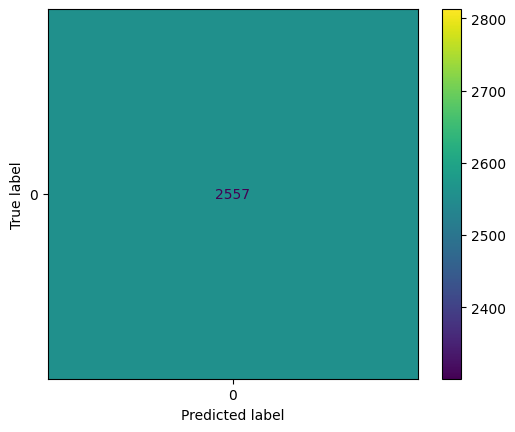

In [18]:
#Presentamos gráfico de matriz
disp2 = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz2)
disp2.plot()

### Conclusiones del trabajo:

Podemos observar que el modelo tiene un 100% de exactitud, esto pudiera ser sinónimo de que hay **Overfitting** en nuestro modelo, puesto que no tenemos más datos para complementar la información, se deberá cambiar el modelo por uno más sencillo de ser posible.